In [1]:
import PySimpleGUI as sg

sg.theme('Topanga')      # Add some color to the window

# Very basic window.  Return values using auto numbered keys

layout = [
    [sg.Text('Please enter your Name, Address, Phone')],
    [sg.Text('Name', size=(15, 1)), sg.InputText()],
    [sg.Text('Address', size=(15, 1)), sg.InputText()],
    [sg.Text('Phone', size=(15, 1)), sg.InputText()],
    [sg.Submit(), sg.Cancel()]
]

window = sg.Window('Simple data entry window', layout)
event, values = window.read()
window.close()
print(event, values[0], values[1], values[2])    # the input data looks like a simple list when auto numbered

Submit   


In [4]:
import PySimpleGUI as sg

"""
    Demo - "Collapsible" sections of windows

    This demo shows one techinique for creating a collapsible section (Column) within your window.

    It uses the "pin" function so you'll need version 4.28.0+

    A number of "shortcut aliases" are used in the layouts to compact things a bit.
    In case you've not encountered these shortcuts, the meaning are:
    B = Button, T = Text, I = Input = InputText, k = key
    Also, both methods for specifying Button colors were used (tuple / single string)
    Section #2 uses them the most to show you what it's like to use more compact names.

    To open/close a section, click on the arrow or name of the section.
    Section 2 can also be controlled using the checkbox at the top of the window just to
    show that there are multiple way to trigger events such as these.

    Copyright 2020 PySimpleGUI.org
"""


SYMBOL_UP =    '▲'
SYMBOL_DOWN =  '▼'


def collapse(layout, key):
    """
    Helper function that creates a Column that can be later made hidden, thus appearing "collapsed"
    :param layout: The layout for the section
    :param key: Key used to make this seciton visible / invisible
    :return: A pinned column that can be placed directly into your layout
    :rtype: sg.pin
    """
    return sg.pin(sg.Column(layout, key=key))


section1 = [[sg.Input('Input sec 1', key='-IN1-')],
            [sg.Input(key='-IN11-')],
            [sg.Button('Button section 1',  button_color='yellow on green'),
             sg.Button('Button2 section 1', button_color='yellow on green'),
             sg.Button('Button3 section 1', button_color='yellow on green')]]

section2 = [[sg.I('Input sec 2', k='-IN2-')],
            [sg.I(k='-IN21-')],
            [sg.B('Button section 2',  button_color=('yellow', 'purple')),
             sg.B('Button2 section 2', button_color=('yellow', 'purple')),
             sg.B('Button3 section 2', button_color=('yellow', 'purple'))]]


layout =   [[sg.Text('Window with 2 collapsible sections')],
            [sg.Checkbox('Blank checkbox'), sg.Checkbox('Hide Section 2', enable_events=True, key='-OPEN SEC2-CHECKBOX')],
            #### Section 1 part ####
            [sg.T(SYMBOL_DOWN, enable_events=True, k='-OPEN SEC1-', text_color='yellow'), sg.T('Section 1', enable_events=True, text_color='yellow', k='-OPEN SEC1-TEXT')],
            [collapse(section1, '-SEC1-')],
            #### Section 2 part ####
            [sg.T(SYMBOL_DOWN, enable_events=True, k='-OPEN SEC2-', text_color='purple'),
             sg.T('Section 2', enable_events=True, text_color='purple', k='-OPEN SEC2-TEXT')],
            [collapse(section2, '-SEC2-')],
            #### Buttons at bottom ####
            [sg.Button('Button1'),sg.Button('Button2'), sg.Button('Exit')]]

window = sg.Window('Visible / Invisible Element Demo', layout)

opened1, opened2 = True, True

while True:             # Event Loop
    event, values = window.read()
    print(event, values)
    if event == sg.WIN_CLOSED or event == 'Exit':
        break

    if event.startswith('-OPEN SEC1-'):
        opened1 = not opened1
        window['-OPEN SEC1-'].update(SYMBOL_DOWN if opened1 else SYMBOL_UP)
        window['-SEC1-'].update(visible=opened1)

    if event.startswith('-OPEN SEC2-'):
        opened2 = not opened2
        window['-OPEN SEC2-'].update(SYMBOL_DOWN if opened2 else SYMBOL_UP)
        window['-OPEN SEC2-CHECKBOX'].update(not opened2)
        window['-SEC2-'].update(visible=opened2)

window.close()

-OPEN SEC1- {0: False, '-OPEN SEC2-CHECKBOX': False, '-IN1-': 'Input sec 1', '-IN11-': '', '-IN2-': 'Input sec 2', '-IN21-': ''}
-OPEN SEC1- {0: False, '-OPEN SEC2-CHECKBOX': False, '-IN1-': 'Input sec 1', '-IN11-': '', '-IN2-': 'Input sec 2', '-IN21-': ''}
-OPEN SEC1- {0: False, '-OPEN SEC2-CHECKBOX': False, '-IN1-': 'Input sec 1', '-IN11-': '', '-IN2-': 'Input sec 2', '-IN21-': ''}
-OPEN SEC1- {0: False, '-OPEN SEC2-CHECKBOX': False, '-IN1-': 'Input sec 1', '-IN11-': '', '-IN2-': 'Input sec 2', '-IN21-': ''}
-OPEN SEC1- {0: False, '-OPEN SEC2-CHECKBOX': False, '-IN1-': 'Input sec 1', '-IN11-': '', '-IN2-': 'Input sec 2', '-IN21-': ''}
-OPEN SEC1- {0: False, '-OPEN SEC2-CHECKBOX': False, '-IN1-': 'Input sec 1', '-IN11-': '', '-IN2-': 'Input sec 2', '-IN21-': ''}
Exit {0: False, '-OPEN SEC2-CHECKBOX': False, '-IN1-': 'Input sec 1', '-IN11-': '', '-IN2-': 'Input sec 2', '-IN21-': ''}


# button関係

In [2]:
import PySimpleGUI as sg

"""
    Demo - Element List

    All elements shown in 1 window as simply as possible.

    Copyright 2022 PySimpleGUI
"""


use_custom_titlebar = True if sg.running_trinket() else False

def make_window(theme=None):

    NAME_SIZE = 23

    def name(name):
        dots = NAME_SIZE-len(name)-2
        return sg.Text(name + ' ' + '•'*dots, size=(NAME_SIZE,1), justification='r',pad=(0,0), font='Courier 10')

    sg.theme(theme)

    # NOTE that we're using our own LOCAL Menu element
    if use_custom_titlebar:
        Menu = sg.MenubarCustom
    else:
        Menu = sg.Menu

    treedata = sg.TreeData()

    treedata.Insert("", '_A_', 'Tree Item 1', [1234], )
    treedata.Insert("", '_B_', 'B', [])
    treedata.Insert("_A_", '_A1_', 'Sub Item 1', ['can', 'be', 'anything'], )

    layout_l = [
                [name('Text'), sg.Text('Text')],
                [name('Input'), sg.Input(s=15)],
                [name('Multiline'), sg.Multiline(s=(15,2))],
                [name('Output'), sg.Output(s=(15,2))],
                [name('Combo'), sg.Combo(sg.theme_list(), default_value=sg.theme(), s=(15,22), enable_events=True, readonly=True, k='-COMBO-')],
                [name('OptionMenu'), sg.OptionMenu(['OptionMenu',],s=(15,2))],
                [name('Checkbox'), sg.Checkbox('Checkbox')],
                [name('Radio'), sg.Radio('Radio', 1)],
                [name('Spin'), sg.Spin(['Spin',], s=(15,2))],
                [name('Button'), sg.Button('Button')],
                [name('ButtonMenu'), sg.ButtonMenu('ButtonMenu', sg.MENU_RIGHT_CLICK_EDITME_EXIT)],
                [name('Slider'), sg.Slider((0,10), orientation='h', s=(10,15))],
                [name('Listbox'), sg.Listbox(['Listbox', 'Listbox 2'], no_scrollbar=True,  s=(15,2))],
                [name('Image'), sg.Image(sg.EMOJI_BASE64_HAPPY_THUMBS_UP)],
                [name('Graph'), sg.Graph((125, 50), (0,0), (125,50), k='-GRAPH-')]  ]

    layout_r  = [[name('Canvas'), sg.Canvas(background_color=sg.theme_button_color()[1], size=(125,40))],
                [name('ProgressBar'), sg.ProgressBar(100, orientation='h', s=(10,20), k='-PBAR-')],
                [name('Table'), sg.Table([[1,2,3], [4,5,6]], ['Col 1','Col 2','Col 3'], num_rows=2)],
                [name('Tree'), sg.Tree(treedata, ['Heading',], num_rows=3)],
                [name('Horizontal Separator'), sg.HSep()],
                [name('Vertical Separator'), sg.VSep()],
                [name('Frame'), sg.Frame('Frame', [[sg.T(s=15)]])],
                [name('Column'), sg.Column([[sg.T(s=15)]])],
                [name('Tab, TabGroup'), sg.TabGroup([[sg.Tab('Tab1',[[sg.T(s=(15,2))]]), sg.Tab('Tab2', [[]])]])],
                [name('Pane'), sg.Pane([sg.Col([[sg.T('Pane 1')]]), sg.Col([[sg.T('Pane 2')]])])],
                [name('Push'), sg.Push(), sg.T('Pushed over')],
                [name('VPush'), sg.VPush()],
                [name('Sizer'), sg.Sizer(1,1)],
                [name('StatusBar'), sg.StatusBar('StatusBar')],
                [name('Sizegrip'), sg.Sizegrip()]  ]

    # Note - LOCAL Menu element is used (see about for how that's defined)
    layout = [[Menu([['File', ['Exit']], ['Edit', ['Edit Me', ]]],  k='-CUST MENUBAR-',p=0)],
              [sg.T('PySimpleGUI Elements - Use Combo to Change Themes', font='_ 14', justification='c', expand_x=True)],
              [sg.Checkbox('Use Custom Titlebar & Menubar', use_custom_titlebar, enable_events=True, k='-USE CUSTOM TITLEBAR-', p=0)],
              [sg.Col(layout_l, p=0), sg.Col(layout_r, p=0)]]

    window = sg.Window('The PySimpleGUI Element List', layout, finalize=True, right_click_menu=sg.MENU_RIGHT_CLICK_EDITME_VER_EXIT, keep_on_top=True, use_custom_titlebar=use_custom_titlebar)

    window['-PBAR-'].update(30)                                                     # Show 30% complete on ProgressBar
    window['-GRAPH-'].draw_image(data=sg.EMOJI_BASE64_HAPPY_JOY, location=(0,50))   # Draw something in the Graph Element

    return window


window = make_window()

while True:
    event, values = window.read()
    # sg.Print(event, values)
    if event == sg.WIN_CLOSED or event == 'Exit':
        break
    if event == 'Edit Me':
        sg.execute_editor(__file__)
    if values['-COMBO-'] != sg.theme():
        sg.theme(values['-COMBO-'])
        window.close()
        window = make_window()
    if event == '-USE CUSTOM TITLEBAR-':
        use_custom_titlebar = values['-USE CUSTOM TITLEBAR-']
        sg.set_options(use_custom_titlebar=use_custom_titlebar)
        window.close()
        window = make_window()
    elif event == 'Version':
        sg.popup_scrolled(sg.get_versions(), __file__, keep_on_top=True, non_blocking=True)
window.close()

In [3]:
import PySimpleGUI as sg

sg.theme('Dark Blue 8')

for i in range(1000):   # this is your "work loop" that you want to monitor
    sg.one_line_progress_meter('One Line Meter Example', i + 1, 1000)
    # after 500 iterations, cancel the meter
    if i == 1000:
        sg.one_line_progress_meter_cancel()
        sg.popup('Cancelled!')
        break

In [4]:
import PySimpleGUI as sg      

    # Green & tan color scheme      
sg.theme('GreenTan')      

sg.set_options(text_justification='right')      

layout = [[sg.Text('Machine Learning Command Line Parameters', font=('Helvetica', 16))],      
          [sg.Text('Passes', size=(15, 1)), sg.Spin(values=[i for i in range(1, 1000)], initial_value=20, size=(6, 1)),      
           sg.Text('Steps', size=(18, 1)), sg.Spin(values=[i for i in range(1, 1000)], initial_value=20, size=(6, 1))],      
          [sg.Text('ooa', size=(15, 1)), sg.In(default_text='6', size=(10, 1)), sg.Text('nn', size=(15, 1)),      
           sg.In(default_text='10', size=(10, 1))],      
          [sg.Text('q', size=(15, 1)), sg.In(default_text='ff', size=(10, 1)), sg.Text('ngram', size=(15, 1)),      
           sg.In(default_text='5', size=(10, 1))],      
          [sg.Text('l', size=(15, 1)), sg.In(default_text='0.4', size=(10, 1)), sg.Text('Layers', size=(15, 1)),      
           sg.Drop(values=('BatchNorm', 'other'), auto_size_text=True)],      
          [sg.Text('_'  * 100, size=(65, 1))],      
          [sg.Text('Flags', font=('Helvetica', 15), justification='left')],      
          [sg.Checkbox('Normalize', size=(12, 1), default=True), sg.Checkbox('Verbose', size=(20, 1))],      
          [sg.Checkbox('Cluster', size=(12, 1)), sg.Checkbox('Flush Output', size=(20, 1), default=True)],      
          [sg.Checkbox('Write Results', size=(12, 1)), sg.Checkbox('Keep Intermediate Data', size=(20, 1))],      
          [sg.Text('_'  * 100, size=(65, 1))],      
          [sg.Text('Loss Functions', font=('Helvetica', 15), justification='left')],      
          [sg.Radio('Cross-Entropy', 'loss', size=(12, 1)), sg.Radio('Logistic', 'loss', default=True, size=(12, 1))],      
          [sg.Radio('Hinge', 'loss', size=(12, 1)), sg.Radio('Huber', 'loss', size=(12, 1))],      
          [sg.Radio('Kullerback', 'loss', size=(12, 1)), sg.Radio('MAE(L1)', 'loss', size=(12, 1))],      
          [sg.Radio('MSE(L2)', 'loss', size=(12, 1)), sg.Radio('MB(L0)', 'loss', size=(12, 1))],      
          [sg.Submit(), sg.Cancel()]]      

window = sg.Window('Machine Learning Front End', layout, font=("Helvetica", 12))      

event, values = window.read()
window.close()

In [44]:
"""
Matplotlibのグラフをsg.Imagenに埋め込む

"""
import io
import numpy as np
import matplotlib.pyplot as plt

import PySimpleGUI as sg

def make_data_fig(make=True):
    fig = plt.figure()

    if make:
        # x = np.linspace(0, 2*np.pi, 500)
        x = np.arange(0, 2*np.pi, 0.05*np.pi)
        ax = fig.add_subplot(111)
        ax.plot(x, np.sin(x))
        return fig

    else:
        return fig

def draw_plot_image(fig):
    item = io.BytesIO()
    plt.savefig(item, format='png')
    plt.clf()
    # plt.close('all')
    return item.getvalue()

sg.theme('Light Blue 2')

layout = [[sg.Text('Graph Diasplay')],
          [sg.Button('Display',key='-display-'), sg.Button('clear',key='-clear-'), sg.Cancel()],
          [sg.Image(filename='', key='-image-')]
          ]

window = sg.Window('Plot', layout, location=(100, 100), finalize=True)

while True:
    event, values = window.read()

    if event in (None, 'Cancel'):
        break

    elif event == '-display-':
        fig_ = make_data_fig()
        fig_bytes = draw_plot_image(fig_)
        window['-image-'].update(data=fig_bytes)

    elif event == '-clear-':
        fig_ = make_data_fig(False)
        fig_bytes = draw_plot_image(fig_)
        window['-image-'].update(data=fig_bytes)

window.close()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

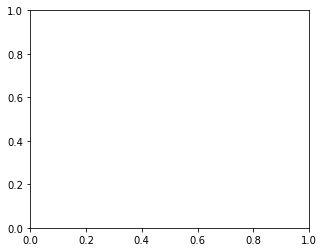

In [8]:
"""
MatplotlibのグラフをCanvasに埋め込む

"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

import PySimpleGUI as sg

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)

def make_data_fig(fig,make = True):

    if make:
        # x = np.linspace(0, 2*np.pi, 500)
        x = np.arange(0, 2*np.pi, 0.05*np.pi)
        ax.plot(x, np.sin(x))
        return fig

    else:
        ax.cla()
        return fig

def draw_figure(canvas, figure):
    figure_canvas = FigureCanvasTkAgg(figure, canvas)
    figure_canvas.draw()
    figure_canvas.get_tk_widget().pack(side='top', fill='both', expand=1)
    return figure_canvas


sg.theme('Light Blue 2')

layout = [[sg.Text('Graph Diasplay')],
          [sg.Button('Display',key='-display-'), sg.Button('clear',key='-clear-'), sg.Cancel()],
          [sg.Canvas(key='-CANVAS-')]
          ]

window = sg.Window('Plot', layout, location =(100,100), finalize=True)

# figとCanvasを関連付ける
fig_agg = draw_figure(window['-CANVAS-'].TKCanvas, fig)

while True:
    event, values = window.read()

    if event in (None, 'Cancel'):
        break

    elif event == '-display-':
        fig = make_data_fig(fig, make=True)
        fig_agg.draw()

    elif event == '-clear-':
        fig = make_data_fig(fig, make=False)
        fig_agg.draw()

window.close()

In [5]:
import PySimpleGUI as sg      

    # Green & tan color scheme      
sg.theme('GreenTan')      

sg.set_options(text_justification='right')      

layout = [   [sg.Text("input folder"), sg.InputText(), sg.FolderBrowse(key="file1")],
          [sg.Text('STFMR prameter', font=('Arial', 16))],           
          [sg.Text('Ms(T)', size=(15, 1)), sg.In(default_text='6', size=(10, 1)), sg.Text('g-factor', size=(15, 1)),      
           sg.In(default_text='10', size=(10, 1))],      
          [sg.Text('FM-thick(nm)', size=(15, 1)), sg.In(default_text='10', size=(10, 1)), sg.Text('NM-thick(nm)', size=(15, 1)),      
           sg.In(default_text='5', size=(10, 1))],      
          [ sg.Text('Stack order', size=(15, 1)),      
           sg.Drop(values=('sub.//FM/NM', 'sub.//NM/FM'), auto_size_text=True)],      
          [sg.Text('_'  * 100, size=(65, 1))],      
          [sg.Text('Flags', font=('Helvetica', 15), justification='left')],      
          [sg.Checkbox('Normalize', size=(12, 1), default=True), sg.Checkbox('Verbose', size=(20, 1))],      
          [sg.Checkbox('Cluster', size=(12, 1)), sg.Checkbox('Flush Output', size=(20, 1), default=True)],      
          [sg.Checkbox('Write Results', size=(12, 1)), sg.Checkbox('Keep Intermediate Data', size=(20, 1))],      
          [sg.Text('_'  * 100, size=(65, 1))],      
          [sg.Text('Loss Functions', font=('Helvetica', 15), justification='left')],      
          [sg.Radio('Cross-Entropy', 'loss', size=(12, 1)), sg.Radio('Logistic', 'loss', default=True, size=(12, 1))],      
          [sg.Radio('Hinge', 'loss', size=(12, 1)), sg.Radio('Huber', 'loss', size=(12, 1))],      
          [sg.Radio('Kullerback', 'loss', size=(12, 1)), sg.Radio('MAE(L1)', 'loss', size=(12, 1))],      
          [sg.Radio('MSE(L2)', 'loss', size=(12, 1)), sg.Radio('MB(L0)', 'loss', size=(12, 1))],      
          [sg.Submit(), sg.Cancel()]]      

window = sg.Window('STFMR intial monitor', layout, font=("Helvetica", 12))      

event, values = window.read()
window.close()
print(event,values)

Cancel {0: '', 'file1': '', 1: '6', 2: '10', 3: '10', 4: '5', 5: '', 6: True, 7: False, 8: False, 9: True, 10: False, 11: False, 12: False, 13: True, 14: False, 15: False, 16: False, 17: False, 18: False, 19: False}


In [25]:
layout = [
   [sg.Text("ファイル"), sg.InputText(), sg.FolderBrowse(key="file1")],
   [sg.Submit(), sg.Cancel()],
]

window = sg.Window("ファイル選択", layout)

event, values = window.read()
window.close()
print(values[0])

In [26]:
import PySimpleGUI as sg

tab1_layout = [[sg.T('タブ１のレイアウト')], [sg.Button('ボタン1', key='-Btn1-')]]

tab2_layout = [[sg.T('タブ２のレイアウト')], [sg.Button('ボタン2', key='-Btn2-')]]

layout = [
    [sg.TabGroup(
        [[sg.Tab('Tab 1', tab1_layout, tooltip='タブ１です'),
          sg.Tab('Tab 2', tab2_layout, tooltip='タブ２です')]])],
]

window = sg.Window('タブ付きウィンドウ', layout, default_element_size=(30, 1), size=(200, 120))

while True:
    event, values = window.read()
    if event == '-Btn1-':
        sg.popup('ボタン１のイベント')
    elif event == '-Btn2-':
        sg.popup('ボタン２のイベント')
    if event is None:
        break

window.close()

In [59]:
sg.set_options(text_justification='right')      

layout = [   [sg.Text("input folder"), sg.InputText(), sg.FolderBrowse(key="file1")],
          [sg.Text('STFMR prameter', font=('Arial', 16))],           
          [sg.Text('Ms(T)', size=(15, 1)), sg.In(default_text='6', size=(10, 1)), sg.Text('g-factor', size=(15, 1)),      
           sg.In(default_text='10', size=(10, 1))],      
          [sg.Text('FM-thick(nm)', size=(15, 1)), sg.In(default_text='10', size=(10, 1)), sg.Text('NM-thick(nm)', size=(15, 1)),      
           sg.In(default_text='5', size=(10, 1))],      
          [ sg.Text('Stack order', size=(15, 1)),      
           sg.Drop(values=('sub.//FM/NM', 'sub.//NM/FM'), auto_size_text=True)],      
          [sg.Text('_'  * 100, size=(65, 1))],      
          [sg.Text('Flags', font=('Helvetica', 15), justification='left')],      
          [sg.Checkbox('Normalize', size=(12, 1), default=True), sg.Checkbox('Verbose', size=(20, 1))],      
          [sg.Checkbox('Cluster', size=(12, 1)), sg.Checkbox('Flush Output', size=(20, 1), default=True)],      
          [sg.Checkbox('Write Results', size=(12, 1)), sg.Checkbox('Keep Intermediate Data', size=(20, 1))],      
          [sg.Text('_'  * 100, size=(65, 1))],      
          [sg.Text('Loss Functions', font=('Helvetica', 15), justification='left')],      
          [sg.Radio('Cross-Entropy', 'loss', size=(12, 1)), sg.Radio('Logistic', 'loss', default=True, size=(12, 1))],      
          [sg.Radio('Hinge', 'loss', size=(12, 1)), sg.Radio('Huber', 'loss', size=(12, 1))],      
          [sg.Radio('Kullerback', 'loss', size=(12, 1)), sg.Radio('MAE(L1)', 'loss', size=(12, 1))],      
          [sg.Radio('MSE(L2)', 'loss', size=(12, 1)), sg.Radio('MB(L0)', 'loss', size=(12, 1))],      
          [sg.Submit(), sg.Cancel()]]      

window = sg.Window('STFMR intial monitor', layout, font=("Helvetica", 12))      

event, values = window.read()
window.close()
print(event,values)

In [25]:
# import pckage (general)
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import os
import matplotlib.cm as cm
import pandas as pd

# private package
import stfmr_ana_process as st
import function_stfmr as func
from visualization import visualization as vis

import PySimpleGUI as sg


In [26]:
layout = [
   [sg.Text("foleder input"), sg.InputText(), sg.FolderBrowse(key="file1")],
   [sg.Submit(), sg.Cancel()],
]

window = sg.Window("folder choice", layout)

event, values = window.read()
window.close()
print(values[0])

C:/Users/s1013/OneDrive/デスクトップ/stfmr_analysis/data/Ti(1)Pt(8)Py(x)SiO2(4)/x=04_3-1


In [27]:
Path_data=os.path.relpath(values[0], './')
target_dir =Path_data+'/'

# インスタンス化
STFMR = st.stfmr_parameter(g=2.099) # g-factor

torque_para = st.torque_eff()

ST_tor= func.fit_func_stfmr()

gene_cal=func.gene_calc()

mypl=vis()

In [4]:
Raw_data_AMR,Fit_para_AMR = STFMR.AMR_repeat_fit(target_dir,'.txt',Plot=False)

In [33]:
Raw_data_AMR,Fit_para_AMR = STFMR.AMR_repeat_fit(target_dir,'.txt',Plot=False)
N = Raw_data_AMR['thickness(nm)'].unique()
for  i in N:
    data = Raw_data_AMR[Raw_data_AMR['thickness(nm)']==i]
    data = data.reset_index(drop=True)
    para = Fit_para_AMR[Fit_para_AMR['thickness(nm)']==i]
    para = para.reset_index(drop =True)
    para_AMR = list(para.loc[0][1:5])
    x = data['angle_raw(deg)']
    y = data['R_AMR_raw(ohm)']
    x_fit = data['fit_angle(deg)']
    ax1.plot(x,((y-(para_AMR[3]*x))/para_AMR[0]-1)*100,'o')
    ax1.plot(x_fit,((ST_tor.AMR(x_fit,*para_AMR)-para_AMR[3]*x_fit)/para_AMR[0]-1)*100,'-k')
    ax1.set_xlabel(r'$\mu_0H (\rm{mT})$',fontsize=20)
    ax1.set_ylabel(r'$V_{\rm{DC}}(\rm{\mu V})$',fontsize=20)
    ax1.set_xlim(0,360)

In [28]:
Raw_data_stfmr,Fit_para_stfmr = STFMR.STFMR_repeat_fit(target_dir,'.lvm',Plot=False)

In [30]:
Raw_data_kittel,Fit_para_kittel = STFMR.kittel_fixed_process(Fit_para_stfmr,Plot=False)

In [31]:
Raw_data_line,Fit_para_line = STFMR.linewidth_process(Fit_para_stfmr,Plot=False)

In [38]:
Fit_para_line

,thickness(nm),alpha_G,W0(mT),alpha_G_err,W0(mT)_err
0,4,0.019068,0.216997,0.000079,0.022693


In [7]:
N = Raw_data_stfmr['thickness(nm)'].unique()
for  i in N:
    data = Raw_data_stfmr[Raw_data_stfmr['thickness(nm)']==i]
    data = data.reset_index(drop=True)
    para = Fit_para_stfmr[Fit_para_stfmr['thickness(nm)']==i]
    para = para.reset_index(drop =True)
    fre = data['frequency(GHz)'].unique()
    for f in fre:
        data_f = data[data['frequency(GHz)']==f]
        data_f = data_f.reset_index(drop=True)
        para_stfmr = para[para['frequency(GHz)']==f]
        para_stfmr = para_stfmr.reset_index(drop =True)
        para_stm = list(para_stfmr.loc[0][2:8])
        para_stp = list(para_stfmr.loc[0][14:20])
        xm = data_f['negative field(mT)']
        ym = data_f['V_DC_raw(uV)_n']
        xm_fit = data_f['fit_negative_field(mT)']
        xp = data_f['positive field(mT)']
        yp = data_f['V_DC_raw(uV)_p']
        xp_fit = data_f['fit_positive_field(mT)']
        plt.plot(xm,ym-para_stm[4]*xm-para_stm[5],'o')
        plt.plot(xm_fit,ST_tor.STFMR(xm_fit,*para_stm)-para_stm[4]*xm_fit-para_stm[5],'-k')
        plt.plot(xp,yp-para_stp[4]*xp-para_stp[5],'o')
        plt.plot(xp_fit,ST_tor.STFMR(xp_fit,*para_stp)-para_stp[4]*xp_fit-para_stp[5],'-k')
        plt.xlabel(r'$\mu_0H (\rm{mT})$',fontsize=20)
        plt.ylabel(r'$V_{\rm{DC}}(\rm{\mu V})$',fontsize=20)
    plt.show()
    Raw_data_kittel,Fit_para_kittel = STFMR.kittel_fixed_process(para,Plot=False)
    para_xi = torque_para.par_data_param(para,Fit_para_kittel)
    result = torque_para.xi_fmr_calc(para_xi,8,624.082)
    plt.plot(result['frequency(GHz)'],result['ξ_FMR'],'o')
    plt.show()
#     ax1.plot(x_fit,((ST_tor.AMR(x_fit,*para_AMR)-para_AMR[3]*x_fit)/para_AMR[0]-1)*100,'-k')

#     ax1.set_xlim(0,360)


In [11]:
#!/usr/bin/env python
from matplotlib.ticker import NullFormatter  # useful for `logit` scale
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import PySimpleGUI as sg
import matplotlib
matplotlib.use('TkAgg')

"""
Demonstrates one way of embedding Matplotlib figures into a PySimpleGUI window.

Basic steps are:
 * Create a Canvas Element
 * Layout form
 * Display form (NON BLOCKING)
 * Draw plots onto convas
 * Display form (BLOCKING)
 
 Based on information from: https://matplotlib.org/3.1.0/gallery/user_interfaces/embedding_in_tk_sgskip.html
 (Thank you Em-Bo & dirck)
"""
sg.theme('Lightblue')      # Add some color to the window


def fig_posi():
    fig = plt.Figure(figsize=(12, 6), dpi=100, facecolor='#f4ffff')
    gs = fig.add_gridspec(2, 9,height_ratios =[1,1])
    ax1 = fig.add_subplot(gs[0, 0:5])
    t = np.arange(0, 3, .01)
    #ax1.plot(t, 2 * np.sin(2 * np.pi * t))
    fig.subplots_adjust(wspace=1, hspace=1)
    ax2 = fig.add_subplot(gs[1, 0:5],sharex=ax1)
    ax3 = fig.add_subplot(gs[0:1, 5:7])
    ax4 = fig.add_subplot(gs[0:1, 7:9])
    ax5 = fig.add_subplot(gs[1:2, 5:9])
    #fig.tight_layout()
    plt.ioff()
    return fig, ax1,ax2, ax3, ax4,ax5
fig, ax1,ax2, ax3, ax4,ax5 =fig_posi()

def make_data_fig(fig,make = True):

    if make:
        Path_data=os.path.relpath(values[0], './')
        target_dir =Path_data+'/'
        Raw_data_stfmr,Fit_para_stfmr = STFMR.STFMR_repeat_fit(target_dir,'.lvm',Plot=False)
        N = Raw_data_stfmr['thickness(nm)'].unique()
        for  i in sorted(list(N)):
            data = Raw_data_stfmr[Raw_data_stfmr['thickness(nm)']==i]
            data = data.reset_index(drop=True)
            para = Fit_para_stfmr[Fit_para_stfmr['thickness(nm)']==i]
            para = para.reset_index(drop =True)
            fre = data['frequency(GHz)'].unique()
            for j,f in enumerate(sorted(list(fre))):
                data_f = data[data['frequency(GHz)']==f]
                data_f = data_f.reset_index(drop=True)
                para_stfmr = para[para['frequency(GHz)']==f]
                para_stfmr = para_stfmr.reset_index(drop =True)
                para_stm = list(para_stfmr.loc[0][2:8])
                para_stp = list(para_stfmr.loc[0][14:20])
                xm = data_f['negative field(mT)']
                ym = data_f['V_DC_raw(uV)_n']
                xm_fit = data_f['fit_negative_field(mT)']
                xp = data_f['positive field(mT)']
                yp = data_f['V_DC_raw(uV)_p']
                xp_fit = data_f['fit_positive_field(mT)']
                ax1.plot(xm,ym-para_stm[4]*xm-para_stm[5],'o',markersize=3,c=cm.hsv(j/len(fre)))
                ax1.plot(xm_fit,ST_tor.STFMR(xm_fit,*para_stm)-para_stm[4]*xm_fit-para_stm[5],'-k')
                ax2.plot(xm,ym-ST_tor.STFMR(xm,*para_stm),'-',c=cm.hsv(j/len(fre)))
                ax1.plot(xp,yp-para_stp[4]*xp-para_stp[5],'o',markersize=3,c=cm.hsv(j/len(fre)))
                ax1.plot(xp_fit,ST_tor.STFMR(xp_fit,*para_stp)-para_stp[4]*xp_fit-para_stp[5],'-k')
                ax2.plot(xp,yp-ST_tor.STFMR(xp,*para_stp),'-',c=cm.hsv(j/len(fre)))
                ax1.set_xlabel(r'$\mu_0H (\rm{mT})$',fontsize=20)
                ax1.set_ylabel(r'$V_{\rm{DC}}(\rm{\mu V})$',fontsize=20)
                ax2.set_xlabel(r'$\mu_0H (\rm{mT})$',fontsize=20)
                ax2.set_ylabel(r'$\rm{Residuals} (\rm{\mu V})$',fontsize=20)
                ax1.set_xlim(-300,300)
            Raw_data_kittel,Fit_para_kittel = STFMR.kittel_fixed_process(para,Plot=False)
            x_kittel = Raw_data_kittel['H_FMR_raw(mT)']
            y_kittel = Raw_data_kittel['frequency_raw(GHz)']
            x_kittel_fit = Raw_data_kittel['fit_H_FMR(mT)']
            para_kittel = Fit_para_kittel.loc[0][1:3]
            ax3.plot(x_kittel,y_kittel,'or',label =str(i)+'nm')
            ax3.plot(x_kittel_fit,ST_tor.kittel_fixed(x_kittel_fit,*para_kittel),'-k')
            ax3.set_xlabel(r'$\mu_0H_{\rm{FMR}} (\rm{mT})$',fontsize=20)
            ax3.set_ylabel(r'$f (\rm{GHz})$',fontsize=20)
            ax3.set_xlim(0,max(x_kittel_fit)*1.2)
            ax3.set_ylim(0,max(y_kittel)*1.2)
            ax3.legend(loc='best',ncol=1,fontsize=10).get_frame().set_alpha(0)
            Raw_data_line,Fit_para_line = STFMR.linewidth_process(para,Plot=False)
            x_line = Raw_data_line['frequency_raw(GHz)']
            y_line = Raw_data_line['line_width(mT)']
            x_line_fit = Raw_data_line['fit_frequency(GHz)']
            ax4.plot(x_line,y_line,'or',label =str(i)+'nm')
            para_line = list(Fit_para_line.loc[0][1:3])
            para_line[0]/=STFMR.gamma
            ax4.plot(x_line_fit,ST_tor.linewidth(x_line_fit,*para_line),'-k')
            ax4.set_xlabel(r'$f (\rm{GHz})$',fontsize=20)
            ax4.set_ylabel(r'$\Delta H (\rm{mT})$',fontsize=20)
            ax4.set_xlim(0,max(x_line_fit))
            ax4.set_ylim(0,max(y_line)*1.8)
            para_xi = torque_para.par_data_param(para,Fit_para_kittel)
            result = torque_para.xi_fmr_calc(para_xi,8,624.082)
            ax5.plot(result['frequency(GHz)'],result['ξ_FMR'],'ok',label=str(i)+'nm')
            ax5.legend(loc='best',ncol=1,fontsize=10).get_frame().set_alpha(0)
            ax5.set_xlabel(r'$f (\rm{GHz})$',fontsize=20)
            ax5.set_ylabel(r'$\xi_{\rm{FMR}}$',fontsize=20)
            ax5.set_ylim(0,max(result['ξ_FMR'])*1.2)
            fig.tight_layout()
            fig_canvas_agg.draw()
            sg.popup('(´・ω・｀)')
            ax1.cla()
            ax2.cla()
            ax3.cla()
            ax4.cla()
            ax5.cla()
        return fig

    else:
        ax1.cla()
        ax2.cla()
        ax3.cla()
        ax4.cla()
        ax5.cla()
        return fig
# ------------------------------- END OF YOUR MATPLOTLIB CODE -------------------------------

# ------------------------------- Beginning of Matplotlib helper code -----------------------

def draw_figure(canvas, figure):
    figure_canvas_agg = FigureCanvasTkAgg(figure, canvas)
    figure_canvas_agg.draw()
    figure_canvas_agg.get_tk_widget().pack(side='top', fill='both', expand=1)
    return figure_canvas_agg

# ------------------------------- Beginning of GUI CODE -------------------------------


tab1_layout = [[sg.Text("foleder input"), sg.InputText(), sg.FolderBrowse(key="file1")],
               [sg.Button('ボタン1', key='-Btn1-',button_color='#0055aa',font=('Arial',15))],
              [sg.Canvas(key='-CANVAS-')],
              [sg.Button('create', key='-display-',button_color='#0055aa',font=('Arial',15)),
               sg.Button('clear', key='-clear-',button_color='#0055aa',font=('Arial',15))]
               
              ]

tab2_layout = [[sg.Text('values[0])',font=('Arial',15),text_color = '#000000',relief=sg.RELIEF_GROOVE,
                       border_width=4, background_color= '#eaffd5')], [sg.Button('ボタン2', key='-Btn2-')]]

layout = [
    [sg.TabGroup(
        [[sg.Tab('Main', tab1_layout, tooltip='解析のメインタブです'),
          sg.Tab('input information', tab2_layout, tooltip='解析の補助情報タブです。')]])],
]



In [12]:
# create the form and show it without the plot
window = sg.Window('Simple STFMR analysis', layout, finalize=True, element_justification='center', font='Arial 18',
                  alpha_channel=0.95, resizable=True)

fig_canvas_agg = draw_figure(window['-CANVAS-'].TKCanvas, fig)
# add the plot to the window

while True:
    event, values = window.read()
    if event == '-Btn1-':
        sg.popup('(´・ω・｀)')
    elif event == '-display-':
        fig = make_data_fig(fig, make=True)

    elif event == '-clear-':
        fig = make_data_fig(fig, make=False)
        fig_canvas_agg.draw()
    if event is None:
        break
# fig_canvas_agg = draw_figure(window['-CANVAS-'].TKCanvas, fig)

# event, values = window.read()

window.close()

In [27]:
 layout = [[sg.Text(’ T e x t オブジェクトの余白と枠 ’,
 font=(’ IP A ゴシック ’,24),
 text_color = ’#0000ff ’,
 relief=sg.RELIEF_SOLID ,
 # relief=sg.RELIEF_RAISED ,
 # relief=sg.RELIEF_SUNKEN ,
 # relief=sg.RELIEF_FLAT ,
 # relief=sg.RELIEF_RIDGE ,
 # relief=sg.RELIEF_GROOVE ,
 border_width=12,
 background_color=’#ffff00 ’,
 # pad=((30,30),(30,30)

SyntaxError: invalid character in identifier (3574701777.py, line 1)

In [10]:
sg.theme_previewer()

In [11]:
sg.preview_all_look_and_feel_themes()

# Table Demo

In [13]:
#!/usr/bin/env python
import PySimpleGUI as sg
import pandas as pd

# Yet another example of showing CSV data in Table

def table_example():

    sg.set_options(auto_size_buttons=True)
    filename = sg.popup_get_file(
        'filename to open', no_window=True, file_types=(("CSV Files", "*.csv"),))
    # --- populate table with file contents --- #
    if filename == '':
        return

    data = []
    header_list = []
    button = sg.popup_yes_no('Does this file have column names already?')

    if filename is not None:
        try:
            # Header=None means you directly pass the columns names to the dataframe
            df = pd.read_csv(filename, sep=',', engine='python', header=None)
            data = df.values.tolist()               # read everything else into a list of rows
            if button == 'Yes':                     # Press if you named your columns in the csv
                # Uses the first row (which should be column names) as columns names
                header_list = df.iloc[0].tolist()
                # Drops the first row in the table (otherwise the header names and the first row will be the same)
                data = df[1:].values.tolist()
            elif button == 'No':                    # Press if you didn't name the columns in the csv
                # Creates columns names for each column ('column0', 'column1', etc)
                header_list = ['column' + str(x) for x in range(len(data[0]))]
        except:
            sg.popup_error('Error reading file')
            return

    layout = [
        [sg.Table(values=data,
                  headings=header_list,
                  display_row_numbers=True,
                  auto_size_columns=False,
                  num_rows=min(25, len(data)))]
    ]

    window = sg.Window('Table', layout, grab_anywhere=False)
    event, values = window.read()
    window.close()


table_example()

# GUI for STFMR

In [5]:
# import pckage (general)
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import os
import matplotlib.cm as cm
import pandas as pd

# private package
import stfmr_ana_process as st
import function_stfmr as func
from visualization import visualization as vis


from matplotlib.ticker import NullFormatter  # useful for `logit` scale
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import PySimpleGUI as sg
import matplotlib
matplotlib.use('TkAgg')

"""
Demonstrates one way of embedding Matplotlib figures into a PySimpleGUI window.

Basic steps are:
 * Create a Canvas Element
 * Layout form
 * Display form (NON BLOCKING)
 * Draw plots onto convas
 * Display form (BLOCKING)
 
 Based on information from: https://matplotlib.org/3.1.0/gallery/user_interfaces/embedding_in_tk_sgskip.html
 (Thank you Em-Bo & dirck)
"""
sg.theme('Lightblue')      # Add some color to the window

mypl=vis() # seting graph appearance

def fig_posi_st():
    fig = plt.Figure(figsize=(12, 6), dpi=100, facecolor='#f4ffff')
    gs = fig.add_gridspec(2, 9,height_ratios =[1,1])
    ax1 = fig.add_subplot(gs[0, 0:5])
    fig.subplots_adjust(wspace=1, hspace=1)
    ax2 = fig.add_subplot(gs[1, 0:5],sharex=ax1)
    ax3 = fig.add_subplot(gs[0:1, 5:7])
    ax4 = fig.add_subplot(gs[0:1, 7:9])
    ax5 = fig.add_subplot(gs[1:2, 5:9])
    #fig.tight_layout()
    plt.ioff()
    return fig, ax1,ax2, ax3, ax4,ax5
fig, ax1,ax2, ax3, ax4,ax5 =fig_posi_st()


def fig_posi_JH():
    fig = plt.Figure(figsize=(12, 6), dpi=100, facecolor='#f4ffff')
    gs = fig.add_gridspec(2, 9,height_ratios =[1,1])
    ax1 = fig.add_subplot(gs[0, 0:4])
    fig.subplots_adjust(wspace=1, hspace=0.5)
    ax2 = fig.add_subplot(gs[1, 0:4])
    ax3 = fig.add_subplot(gs[0:1, 5:9])
    ax4 = fig.add_subplot(gs[1, 5:9])
    #fig.tight_layout()
    plt.ioff()
    return fig, ax1,ax2, ax3, ax4
fig_JH, ax1_JH,ax2_JH, ax3_JH, ax4_JH =fig_posi_JH()


# ST-FMR tab
def make_data_fig_st(fig,make = True):

    if make:
        try:
            STFMR = st.stfmr_parameter(g=float(values['g_factor'])) # g-factor
            torque_para = st.torque_eff()
            ST_tor= func.fit_func_stfmr()
            gene_cal=func.gene_calc()
            
            
            Path_data=os.path.relpath(values[0], './')
            target_dir =Path_data+'/'
            Raw_data_stfmr,Fit_para_stfmr = STFMR.STFMR_repeat_fit(target_dir,'.lvm',Plot=False)
            N = Raw_data_stfmr['thickness(nm)'].unique()
            fontsize1=15
            for k, i in enumerate(sorted(list(N))):
                data = Raw_data_stfmr[Raw_data_stfmr['thickness(nm)']==i]
                data = data.reset_index(drop=True)
                para = Fit_para_stfmr[Fit_para_stfmr['thickness(nm)']==i]
                para = para.reset_index(drop =True)
                fre = data['frequency(GHz)'].unique()
                for j,f in enumerate(sorted(list(fre))):
                    data_f = data[data['frequency(GHz)']==f]
                    data_f = data_f.reset_index(drop=True)
                    para_stfmr = para[para['frequency(GHz)']==f]
                    para_stfmr = para_stfmr.reset_index(drop =True)
                    para_stm = list(para_stfmr.loc[0][2:8])
                    para_stp = list(para_stfmr.loc[0][14:20])
                    xm = data_f['negative field(mT)']
                    ym = data_f['V_DC_raw(uV)_n']
                    xm_fit = data_f['fit_negative_field(mT)']
                    xp = data_f['positive field(mT)']
                    yp = data_f['V_DC_raw(uV)_p']
                    xp_fit = data_f['fit_positive_field(mT)']
                    ax1.plot(xm,ym-para_stm[4]*xm-para_stm[5],'o',markersize=3,c=cm.hsv(j/len(fre)))
                    ax1.plot(xm_fit,ST_tor.STFMR(xm_fit,*para_stm)-para_stm[4]*xm_fit-para_stm[5],'-k')
                    ax2.plot(xm,ym-ST_tor.STFMR(xm,*para_stm),'-',c=cm.hsv(j/len(fre)))
                    ax1.plot(xp,yp-para_stp[4]*xp-para_stp[5],'o',markersize=3,c=cm.hsv(j/len(fre)))
                    ax1.plot(xp_fit,ST_tor.STFMR(xp_fit,*para_stp)-para_stp[4]*xp_fit-para_stp[5],'-k')
                    ax2.plot(xp,yp-ST_tor.STFMR(xp,*para_stp),'-',c=cm.hsv(j/len(fre)))
                    ax1.set_xlabel(r'$\mu_0H (\rm{mT})$',fontsize=fontsize1)
                    ax1.set_ylabel(r'$V_{\rm{DC}}(\rm{\mu V})$',fontsize=fontsize1)
                    ax2.set_xlabel(r'$\mu_0H (\rm{mT})$',fontsize=fontsize1)
                    ax2.set_ylabel(r'$\rm{Residuals} (\rm{\mu V})$',fontsize=fontsize1)
                    ax1.set_xlim(-300,300)
                    ax1.set_title('ST-FMR signal '+values['stack'])
                Raw_data_kittel,Fit_para_kittel = STFMR.kittel_fixed_process(para,Plot=False)
                x_kittel = Raw_data_kittel['H_FMR_raw(mT)']
                y_kittel = Raw_data_kittel['frequency_raw(GHz)']
                x_kittel_fit = Raw_data_kittel['fit_H_FMR(mT)']
                para_kittel = Fit_para_kittel.loc[0][1:3]
                ax3.plot(x_kittel,y_kittel,'ok',label =str(i)+'nm')
                ax3.plot(x_kittel_fit,ST_tor.kittel_fixed(x_kittel_fit,*para_kittel),'-r')
                ax3.set_xlabel(r'$\mu_0H_{\rm{FMR}} (\rm{mT})$',fontsize=fontsize1)
                ax3.set_ylabel(r'$f (\rm{GHz})$',fontsize=fontsize1)
                ax3.set_xlim(0,max(x_kittel_fit)*1.2)
                ax3.set_ylim(0,max(y_kittel)*1.2)
                ax3.legend(loc='best',ncol=1,fontsize=10).get_frame().set_alpha(0)
                Raw_data_line,Fit_para_line = STFMR.linewidth_process(para,Plot=False)
                x_line = Raw_data_line['frequency_raw(GHz)']
                y_line = Raw_data_line['line_width(mT)']
                x_line_fit = Raw_data_line['fit_frequency(GHz)']
                ax4.plot(x_line,y_line,'ok',label =str(i)+'nm')
                para_line = list(Fit_para_line.loc[0][1:3])
                para_line[0]/=STFMR.gamma
                ax4.plot(x_line_fit,ST_tor.linewidth(x_line_fit,*para_line),'-r')
                ax4.set_xlabel(r'$f (\rm{GHz})$',fontsize=fontsize1)
                ax4.set_ylabel(r'$\Delta H (\rm{mT})$',fontsize=fontsize1)
                ax4.set_xlim(0,max(x_line_fit))
                ax4.set_ylim(0,max(y_line)*1.8)
                para_xi = torque_para.par_data_param(para,Fit_para_kittel)
                if len(N)<2:
                    result = torque_para.xi_fmr_single(para_xi,d_N=float(values['d_N']),Ms=float(values['Ms']),d_F=float(values['d_F']))
                else:
                    result = torque_para.xi_fmr_calc(para_xi,d_N=float(values['d_N']),Ms=float(values['Ms']))
                ax5.plot(result['frequency(GHz)'],result['ξ_FMR'],'ok',label=str(i)+'nm')
                ax5.legend(loc='best',ncol=1,fontsize=10).get_frame().set_alpha(0)
                ax5.set_xlabel(r'$f (\rm{GHz})$',fontsize=fontsize1)
                ax5.set_ylabel(r'$\xi_{\rm{FMR}}$',fontsize=fontsize1)
                ax5.set_ylim(0,max(result['ξ_FMR'])*1.2)
                fig.tight_layout()
                fig_canvas_agg.draw()
                window['-Meff-'].update(round(Fit_para_kittel['Meff(mT)'][0],2))
                window['-alpha-'].update(round(Fit_para_line['alpha_G'][0],5))
                A = sg.popup_yes_no(str(int(k+1))+'/'+str(len(N))+'を表示。\n 続行しますか？',title='解析実行中')
                if A=='No':
                    sg.popup_notify('解析を中断しました。')
                    break
                ax1.cla()
                ax2.cla()
                ax3.cla()
                ax4.cla()
                ax5.cla()
            return fig
        except Exception as e:
            sg.popup('(´・ω・｀)このままじゃフィッティングできないお \n'+'Error message:'+str(e),title='注意')

    else:
        ax1.cla()
        ax2.cla()
        ax3.cla()
        ax4.cla()
        ax5.cla()
        return fig
    
#------------------------------------------------------------------------------------------
# JH and AMR tab
def make_data_fig_JH(fig,make = True):
    if make:
        try:
            STFMR = st.stfmr_parameter(g=float(values['g_factor'])) # g-factor
            torque_para = st.torque_eff()
            ST_tor= func.fit_func_stfmr()
            gene_cal=func.gene_calc()
            # AMR
            Path_data=os.path.relpath(values['AMR'], './')
            target_dir =Path_data+'/'
            Raw_data_AMR,Fit_para_AMR = STFMR.AMR_repeat_fit(target_dir,'.txt',Plot=False)
            N = Raw_data_AMR['thickness(nm)'].unique()
            #Joule-heating
            Path_data_JH=os.path.relpath(values['JH'], './')
            target_dir_JH =Path_data_JH+'/'
            Raw_data_DC,Fit_para_DC = STFMR.DC_repeat_fit(target_dir_JH,'.txt','DC',Plot=False)
            fontsize1=15
            for k, i in enumerate(sorted(list(N))):
                data = Raw_data_AMR[Raw_data_AMR['thickness(nm)']==i]
                data = data.reset_index(drop=True)
                para = Fit_para_AMR[Fit_para_AMR['thickness(nm)']==i]
                para = para.reset_index(drop =True)
                para_AMR = list(para.loc[0][1:5])
                x_AMR = data['angle_raw(deg)']
                y_AMR = data['R_AMR_raw(ohm)']
                x_AMR_fit = data['fit_angle(deg)']
                ax4_JH.plot(x_AMR,((y_AMR-para_AMR[3]*x_AMR)/para_AMR[0]-1)*100,'o',markersize=3,c=cm.hsv(k/len(N)))
                ax4_JH.plot(x_AMR_fit,((ST_tor.AMR(x_AMR_fit,*para_AMR)-para_AMR[3]*x_AMR_fit)/para_AMR[0]-1)*100,'-k')
                ax4_JH.set_xlabel(r'$\theta (\rm{deg})$',fontsize=fontsize1)
                ax4_JH.set_ylabel(r'$\Delta R/R_{\perp} (\%)$',fontsize=fontsize1)
                ax4_JH.set_xlim(0,360)
                ax4_JH.set_ylim(0,1.2)
                data_DC = Raw_data_DC[Raw_data_DC['thickness(nm)']==i]
                data_DC = data_DC.reset_index(drop =True)
                para_DC = Fit_para_DC[Fit_para_DC['thickness(nm)']==i]
                para_DC = para_DC.reset_index(drop =True)
                para_DC = list(para_DC.loc[0][1:4])
                x_DC = data_DC['current_raw(mA)']
                y_DC = data_DC['R_DC_raw(ohm)']
                x_DC_fit = data_DC['fit_current(mA)']
                ax1_JH.plot(x_DC,y_DC-para_DC[2],'o',markersize=3,c=cm.hsv(k/len(N)))
                ax1_JH.plot(x_DC_fit,ST_tor.DC(x_DC_fit,*para_DC)-para_DC[2],'-k')
                ax1_JH.set_xlabel(r'$I_{\rm{DC}} (\rm{mA})$',fontsize=fontsize1)
                ax1_JH.set_ylabel(r'$\Delta R_{\rm{J}} (\rm{\Omega})$',fontsize=fontsize1)
                fig_canvas_agg_JH.draw()
            return fig
        except Exception as e:
            sg.popup('(´・ω・｀)このままじゃフィッティングできないお \n'+'Error message:'+str(e),title='注意')
    else:
        ax4_JH.cla()
        ax1_JH.cla()
        ax2_JH.cla()
        ax3_JH.cla()
        return fig

# ------------------------------- END OF YOUR MATPLOTLIB CODE -------------------------------

# ------------------------------- Beginning of Matplotlib helper code -----------------------

def draw_figure(canvas, figure):
    figure_canvas_agg = FigureCanvasTkAgg(figure, canvas)
    figure_canvas_agg.draw()
    figure_canvas_agg.get_tk_widget().pack(side='top', fill='both', expand=1)
    return figure_canvas_agg

# ------------------------------- Beginning of GUI CODE -------------------------------


tab1_layout = [[sg.Text("folder input"), sg.InputText(), sg.FolderBrowse(key="file1")],
               [sg.Text('STFMR prameter', font=('Arial', 16))],           
          [sg.Text('M_s(mT)', size=(15, 1)), sg.In(default_text='600', size=(10, 1),key='Ms'), sg.Text('g-factor', size=(15, 1)),      
           sg.In(default_text='2.099', size=(10, 1),key='g_factor')],      
          [sg.Text('FM-thick(nm)', size=(15, 1)), sg.In(default_text='10', size=(10, 1),key='d_F'), sg.Text('NM-thick(nm)', size=(15, 1)),      
           sg.In(default_text='8', size=(10, 1),key='d_N')],      
          [ sg.Text('Stack order', size=(15, 1)),      
           sg.Drop(values=('sub.//FM/NM', 'sub.//NM/FM'), auto_size_text=True,readonly=True,key='stack')],
               [sg.T('M_eff(mT)='),sg.T('',size=(10,1),key='-Meff-'),sg.T('α='),sg.T('',size=(10,1),key='-alpha-')],
               [sg.HSeparator()],
               [sg.Button('ボタン1', key='-Btn1-',button_color='#0055aa',font=('Arial',15))],
              [sg.Canvas(key='-CANVAS-')],
              [sg.Button('fit start', key='-display-',button_color='#0055aa',font=('Arial',15)),
               sg.Button('clear fig', key='-clear-',button_color='#0055aa',font=('Arial',15))]
               
              ]

tab2_layout = [[sg.Text("読み込んだフォルダ"),sg.Text('',font=('Arial',15),text_color = '#000000',relief=sg.RELIEF_GROOVE,
                       border_width=4, background_color= '#eaffd5',key='-PATH-')], [sg.Button('ボタン2', key='-Btn2-')]]

tab3_layout = [
   [sg.Text("folder input(JH)"), sg.InputText(), sg.FolderBrowse(key="JH")] ,
     [sg.Text("folder input(AMR)"), sg.InputText(), sg.FolderBrowse(key="AMR")],
    [sg.Canvas(key='-CANVAS2-')],
    [sg.Button('fit start', key='-JH_analysis-',button_color='#0055aa',font=('Arial',15)),
               sg.Button('clear fig', key='-JH_clear-',button_color='#0055aa',font=('Arial',15))]
]

layout = [
    [sg.TabGroup(
        [[sg.Tab('Single', tab1_layout, tooltip='解析のメインタブです'),
          sg.Tab('sub information', tab2_layout, tooltip='解析の補助情報タブです。'),
       sg.Tab('AMR, Joule-heating', tab3_layout, tooltip='AMRとJoule-heating解析タブです。')  ]])],
]


# create the form and show it without the plot
window = sg.Window('Simple STFMR analysis', layout, finalize=True, element_justification='center', font='Arial 18',
                  alpha_channel=0.95, resizable=True)

fig_canvas_agg = draw_figure(window['-CANVAS-'].TKCanvas, fig)
fig_canvas_agg_JH = draw_figure(window['-CANVAS2-'].TKCanvas, fig_JH)
# add the plot to the window

while True:
    event, values = window.read()
    if event == '-Btn1-':
        sg.popup('(´・ω・｀)')
    elif event == '-display-':
        window['-PATH-'].update(values[0])
        fig = make_data_fig_st(fig, make=True)
    elif event == '-clear-':
        fig = make_data_fig_st(fig, make=False)
        fig_canvas_agg.draw()
    elif event == '-JH_analysis-':
        fig_JH == make_data_fig_JH(fig_JH, make= True)
    elif event == '-JH_clear-':
        fig_JH == make_data_fig_JH(fig_JH, make= False)
        fig_canvas_agg_JH.draw()
    if event is None:
        break
# fig_canvas_agg = draw_figure(window['-CANVAS-'].TKCanvas, fig)

# event, values = window.read()
window.close()
